In [66]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [27]:
data = pd.read_csv("/Users/pavithrasusanmathew/Downloads/marketing_campaign.csv",sep = "\t")
data.head(5)
##data.to_csv("marketing.csv",index=False,sep="\t")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [29]:
data = data.dropna()
print("no of rows remaining after removal",len(data))

no of rows remaining after removal 2216


In [47]:
data["Dt_customer"] = pd.to_datetime(data["Dt_Customer"],errors = "coerce" )
dates = []
for i in data["Dt_Customer"]:
    if pd.notnull(i):
       dates.append(i)
    else:
        dates.append(None)

print("The newest customer's enrolment date is",max(dates))
print("The oldest customer's enrolment date is" ,min(dates))                        

The newest customer's enrolment date is 31-12-2013
The oldest customer's enrolment date is 01-01-2013


In [48]:
print(data["Dt_Customer"].dtype)

object


In [43]:
import re
# Define a function to infer a date format
def infer_date_format(date_string):
    # Regular expressions for different common date formats
    patterns = {
        "%d-%m-%Y": r"\d{2}-\d{2}-\d{4}",
        "%Y-%m-%d": r"\d{4}-\d{2}-\d{2}",
        "%m/%d/%Y": r"\d{2}/\d{2}/\d{4}",
        "%d.%m.%Y": r"\d{2}\.\d{2}\.\d{4}",
    }
    
    for date_format, pattern in patterns.items():
        if re.match(pattern, date_string):
            return date_format
    return "Unknown Format"

# Apply the function to the column to identify the formats
data['date_format'] = data["Dt_Customer"].apply(infer_date_format)

# Find unique formats by first converting to a Series and then using unique()
unique_formats = data['date_format'].dropna().unique()

# Display the results
print("Unique date formats found:")
print(unique_formats)

Unique date formats found:
['%d-%m-%Y']


In [39]:
unique_formats.shape

(2216, 1)

In [41]:
unique_formats.dropindex()

AttributeError: 'DataFrame' object has no attribute 'dropindex'

In [73]:
#Created a feature "Customer_For"
days = []
newest_date = max(filter(None, dates))
d1 = pd.to_datetime(newest_date)

         #taking it to be the newest customer
for i in dates:
    i = pd.to_datetime(i)
    delta = (d1-i).days
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [77]:
print(data["Customer_For"])
print(newest_date)
print(dates)

0       631
1      -215
2       132
3      -275
4       -19
       ... 
2235    201
2236   -279
2237    -25
2238    -24
2239    442
Name: Customer_For, Length: 2216, dtype: int64
31-12-2013
['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014', '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013', '06-06-2013', '13-03-2014', '13-11-2012', '15-11-2013', '15-11-2013', '10-10-2012', '24-11-2012', '24-12-2012', '31-08-2012', '28-03-2013', '03-11-2012', '08-08-2012', '06-01-2013', '23-12-2012', '11-01-2014', '18-03-2013', '02-01-2013', '27-05-2013', '31-05-2013', '22-11-2013', '22-05-2014', '11-05-2013', '10-10-2012', '29-10-2012', '20-02-2013', '29-08-2013', '31-12-2013', '02-09-2013', '11-02-2014', '01-02-2013', '29-04-2013', '12-03-2013', '24-12-2012', '02-10-2013', '28-06-2014', '09-11-2012', '24-05-2013', '08-11-2012', '12-05-2014', '11-08-2012', '02-01-2013', '07-06-2014', '12-06-2013', '19-11-2012', '02-04-2013', '28-04-2014', '03-03-2014', '04-07-2013', '07-09-2012', '18-02-2013

In [70]:
print(min(dates))

01-01-2013


In [75]:
print(max(dates))

31-12-2013


In [78]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,date_format,Dt_customer,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,%d-%m-%Y,2012-04-09,631
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,%d-%m-%Y,2014-08-03,-215
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,%d-%m-%Y,NaT,132
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,%d-%m-%Y,2014-10-02,-275
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,%d-%m-%Y,NaT,-19


In [82]:
print(data["Marital_Status"].value_counts())

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [83]:
print(data["Education"].value_counts())

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [85]:
data["Age"] = 2021-data["Year_Birth"]
print(data["Age"])

0       64
1       67
2       56
3       37
4       40
        ..
2235    54
2236    75
2237    40
2238    65
2239    67
Name: Age, Length: 2216, dtype: int64


In [87]:
data["Spent"]= data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
print(data["Spent"])

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent, Length: 2216, dtype: int64


In [91]:
pd.unique(data["Marital_Status"])

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [93]:
data["Living_With"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})
print(data["Living_With"])

0         Alone
1         Alone
2       Partner
3       Partner
4       Partner
         ...   
2235    Partner
2236    Partner
2237      Alone
2238    Partner
2239    Partner
Name: Living_With, Length: 2216, dtype: object


In [95]:
data["Children"] = data["Kidhome"]+data["Teenhome"]
print(data["Children"])

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2216, dtype: int64


In [97]:
data["Family_Size"] = data["Living_With"].replace({"Alone" : 1, "Partner" :2})+ data["Children"]
print(data["Family_Size"])

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2216, dtype: int64


In [99]:
data["Is_Parent"] = np.where(data.Children>0,1,0)
print(data["Is_Parent"])

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Is_Parent, Length: 2216, dtype: int64


In [100]:
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
print(data["Education"])

0           Graduate
1           Graduate
2           Graduate
3           Graduate
4       Postgraduate
            ...     
2235        Graduate
2236    Postgraduate
2237        Graduate
2238    Postgraduate
2239    Postgraduate
Name: Education, Length: 2216, dtype: object


In [101]:
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


In [105]:
to_drop = ["Marital_Status","Dt_Customer","Z_CostContact","Z_Revenue","Year_Birth","ID"]
data = data.drop(to_drop,axis=1)

KeyError: "['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID'] not found in axis"

In [112]:
data = data.drop(["date_format","Dt_customer"],axis=1)

In [113]:
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,631,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,-215,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,132,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,-275,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,-19,40,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,201,54,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,-279,75,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,-25,40,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,-24,65,843,Partner,1,3,1


In [114]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,172.006318,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,232.469034,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-340.000000,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,173.000000,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,346.000000,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,723.000000,128.000000,2525.000000,3.000000,5.000000,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

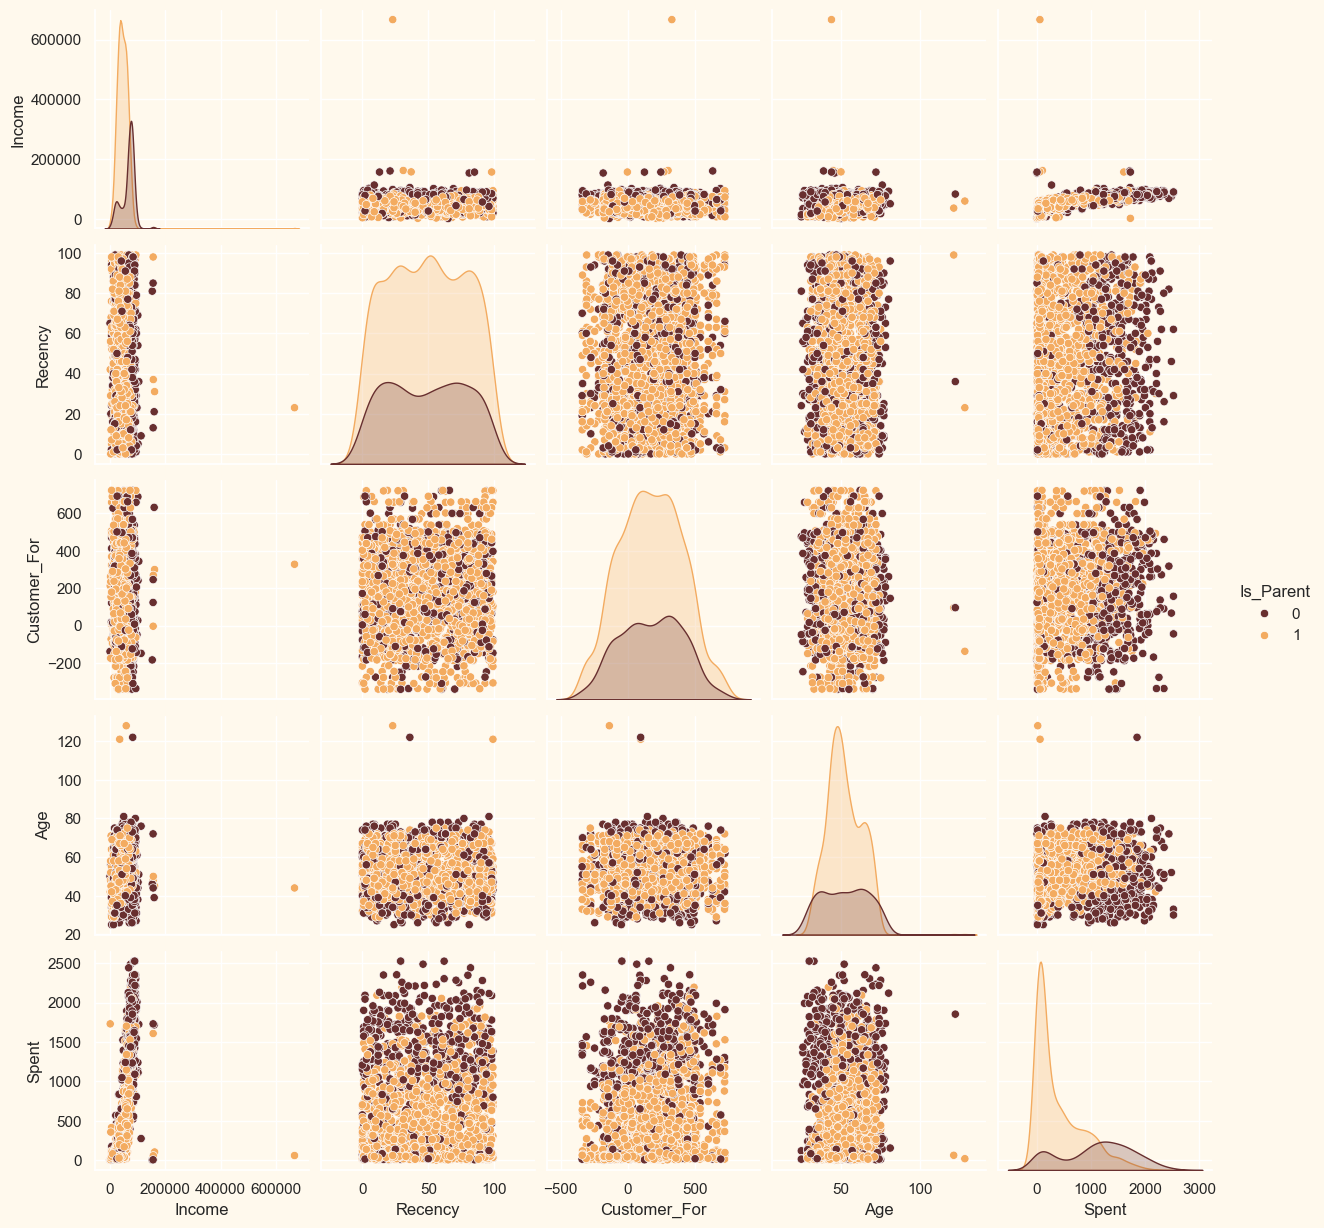

In [115]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [116]:
data= data[(data["Age"] < 90)]
data = data[(data["Income"] < 600000)]
print("the no of rows in data is",len(data))

the no of rows in data is 2212


<Axes: >

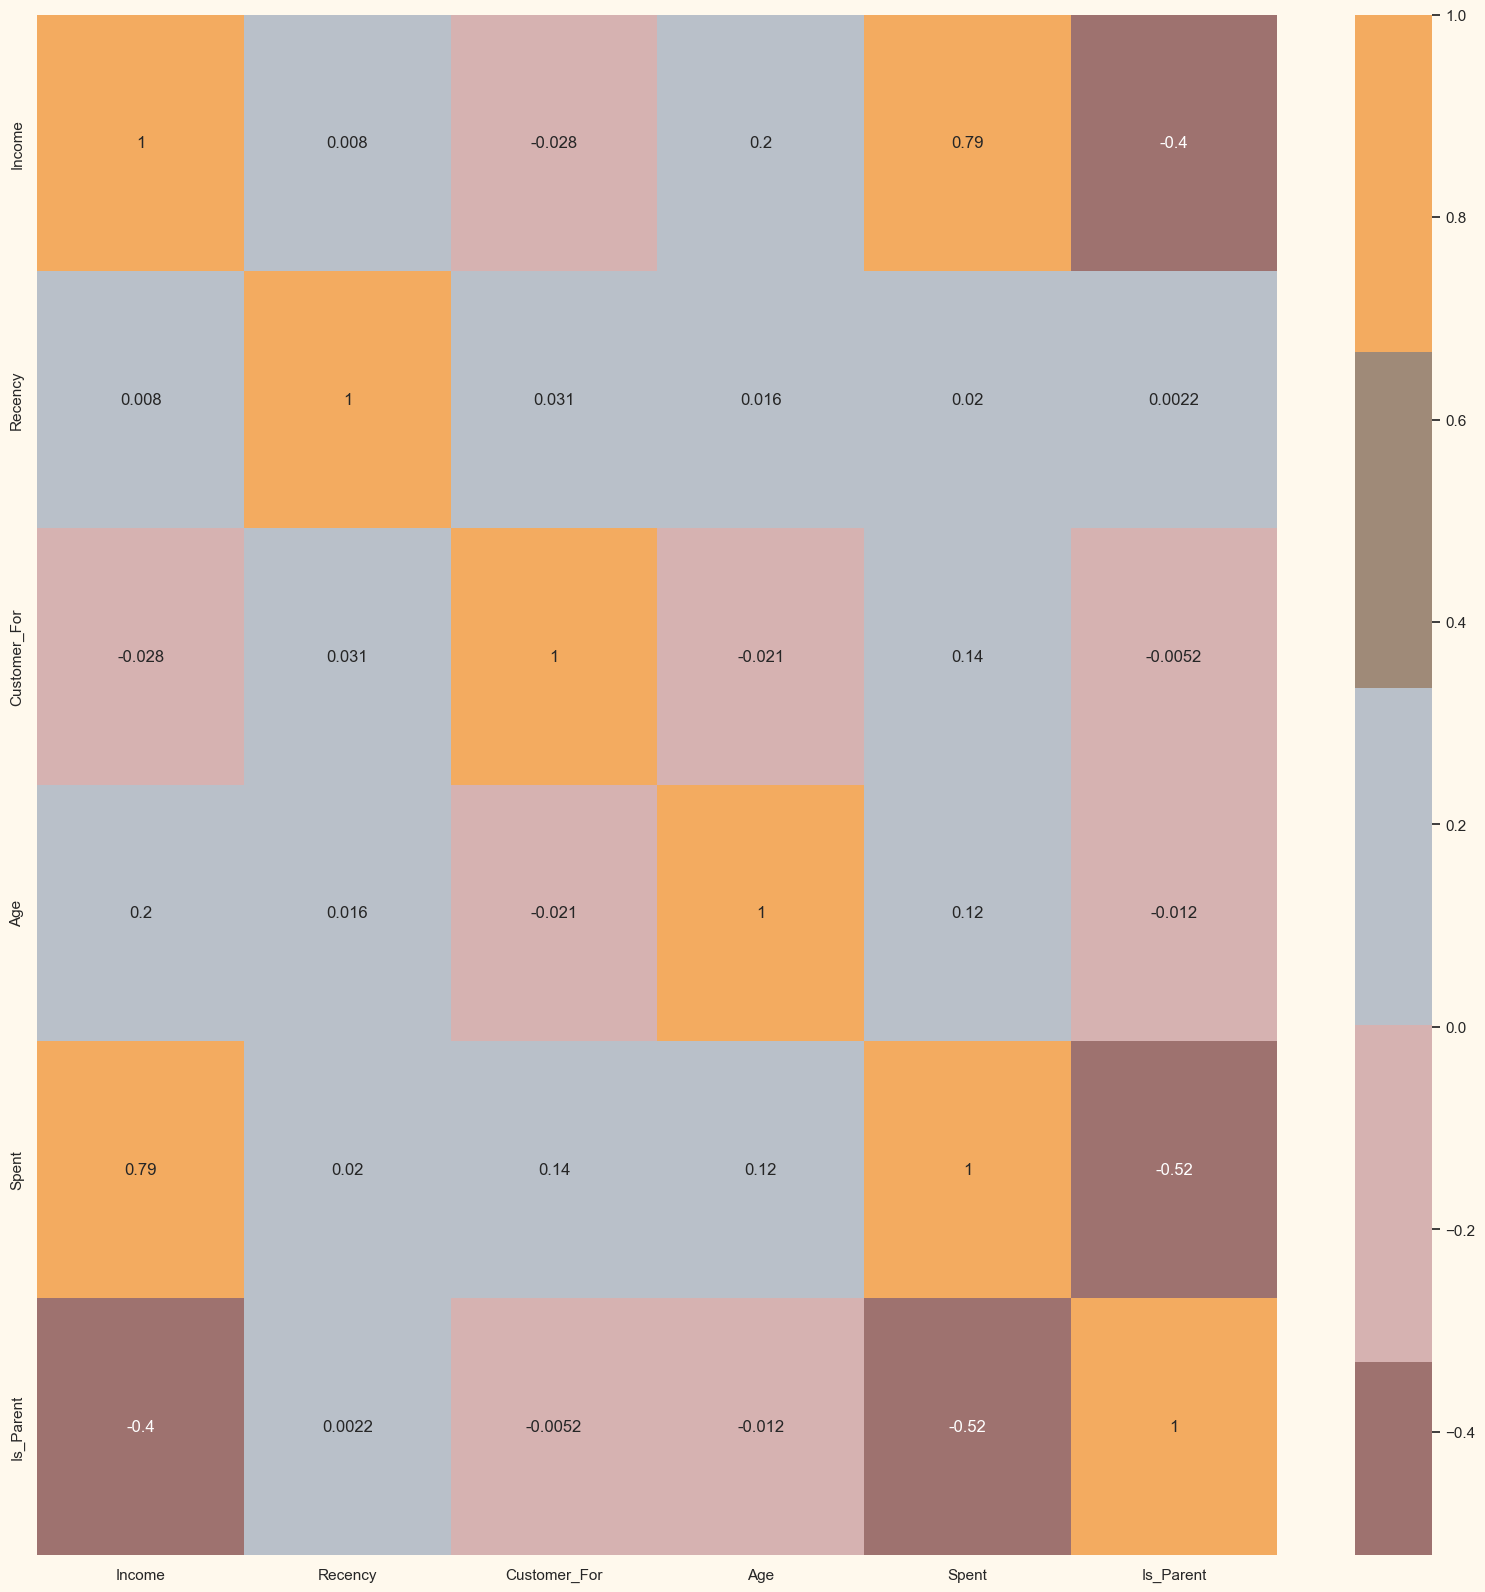

In [123]:
columns_to_plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
data_subset = data[columns_to_plot]
corrmat = data_subset.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)


In [129]:
s = data.dtypes == 'object'
#print(s)
object_columns = data.columns[s]
print(object_columns)

Index(['Education', 'Living_With'], dtype='object')


In [132]:
s = data.dtypes == 'object'
object_cols = data.columns[s]
print(object_cols)

Index(['Education', 'Living_With'], dtype='object')


In [135]:
LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)

print("All Features are now numerical")

All Features are now numerical


In [136]:
LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)

print("All Features are Numerical")

All Features are Numerical


In [137]:
ds = data.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis =1)

scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns = ds.columns)
print("Al Features are now scaled")

Al Features are now scaled


In [138]:
print("DataFrame to be modelled further:")
scaled_ds.head()

DataFrame to be modelled further:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [142]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns = (["col1","col2","col3"]))
PCA_ds.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-3.212219e-17,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,7.066881e-17,1.706839,-4.312182,-1.328322,-0.158129,1.242288,6.142725
col3,2212.0,-1.606109e-17,1.221957,-3.530487,-0.828816,-0.021929,0.799398,6.615126


In [ ]:
pca = PCA(n_components = 3)
pca.fit(scaled_ds)
pca_ds = pd.DataFrame(pca.transform(scaled_ds) = columns = (["col1","col2","col3"]))
pca_ds.describe().T


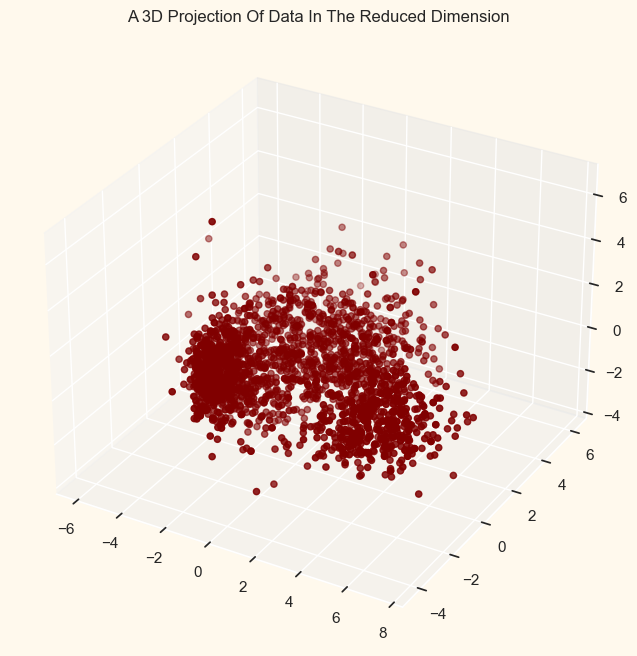

In [145]:
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111,projection = "3d")
ax.scatter(x,y,z,c="maroon",marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow method to determine the number of clusters to be:


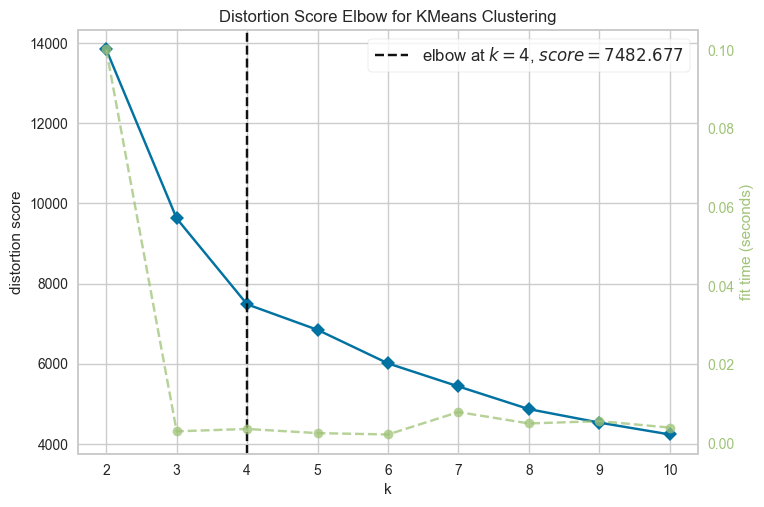

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [149]:
from yellowbrick.cluster import KElbowVisualizer
print("Elbow method to determine the number of clusters to be:")
Elbow_M = KElbowVisualizer(KMeans(),k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

pip install yellowbrick

In [151]:
AC = AgglomerativeClustering(n_clusters = 4)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
data["Clusters"] = yhat_AC

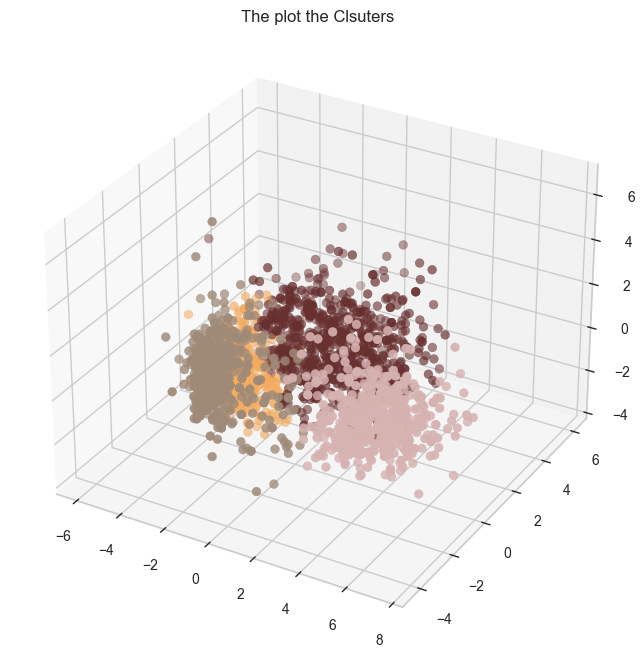

In [152]:
fid = plt.figure(figsize= (10,8))
ax = plt.subplot(111,projection = '3d',label='bla')
ax.scatter(x,y,z,s=40,c=PCA_ds["Clusters"],marker = "o",cmap=cmap)
ax.set_title("The plot the Clsuters")
plt.show()

Clusters
0    708
2    580
1    487
3    437
Name: count, dtype: int64


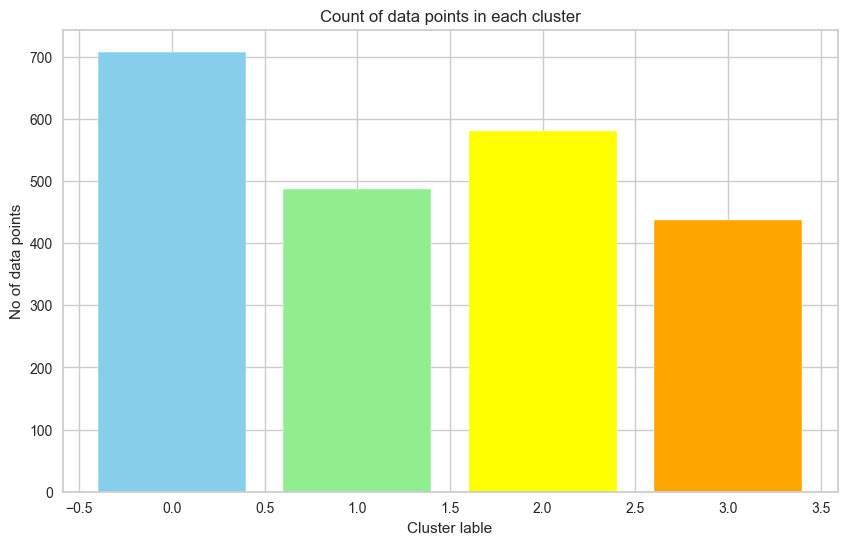

In [170]:
cluster_counts = data["Clusters"].value_counts()
print(cluster_counts)
labels = cluster_counts.index
values = cluster_counts.values

plt.figure(figsize=(10,6))
colors = ["skyblue", "yellow", "lightgreen", "orange"]
bars = plt.bar(labels,values,color = colors)
plt.xlabel("Cluster lable")
plt.ylabel("No of data points")
plt.title("Count of data points in each cluster")
plt.show()

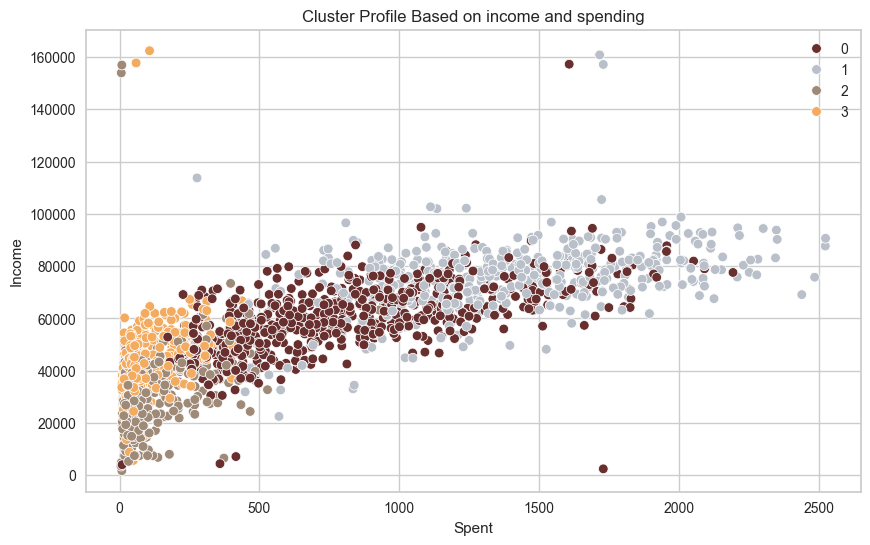

In [173]:
plt.figure(figsize=(10,6))
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
s = sns.scatterplot(data,x = data["Spent"],y = data["Income"],hue=data["Clusters"],palette=pal)
s.set_title("Cluster Profile Based on income and spending")
plt.legend()
plt.show()

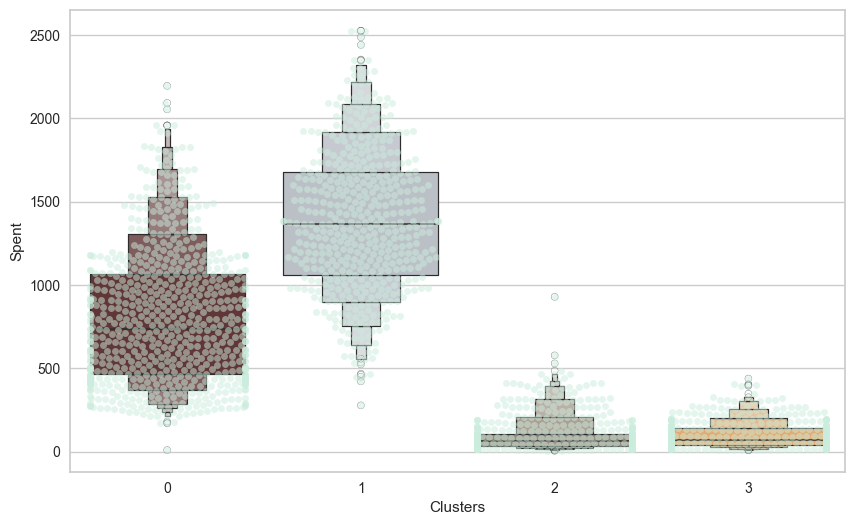

In [176]:
plt.figure(figsize = (10,6))
pl = sns.swarmplot(data,x=data["Clusters"],y=data["Spent"],color= "#CBEDDD",alpha=0.5)
pl = sns.boxenplot(x=data["Clusters"],y=data["Spent"],palette=pal)
plt.show()

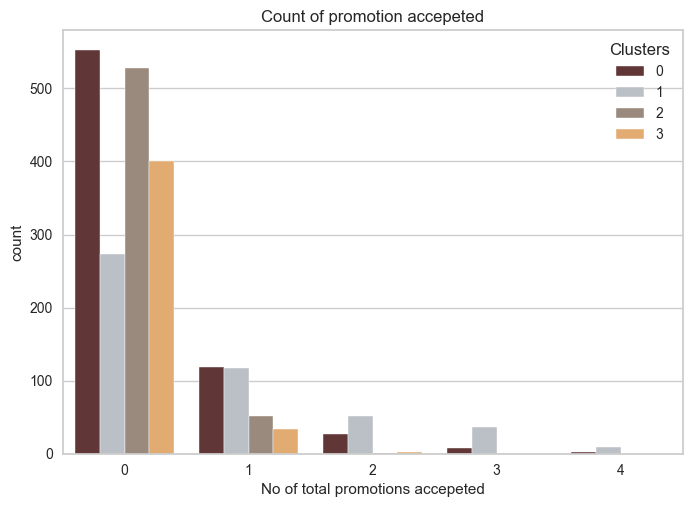

In [181]:
data["Total_Promos"] = data["AcceptedCmp1"]+data["AcceptedCmp2"]+data["AcceptedCmp3"]+data["AcceptedCmp4"]+data["AcceptedCmp5"]
plt.figure()
pls = sns.countplot(x=data["Total_Promos"] , hue=data["Clusters"], palette=pal)
pls.set_title("Count of promotion accepeted")
pls.set_xlabel("No of total promotions accepeted")
plt.show()

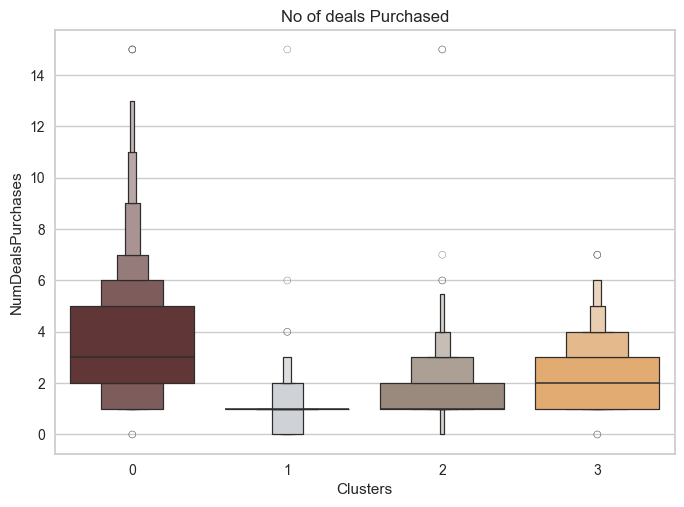

In [183]:
plt.figure()
pl = sns.boxenplot(x=data["Clusters"],y=data["NumDealsPurchases"],palette=pal)
pl.set_title("No of deals Purchased")
plt.show()

<Figure size 800x550 with 0 Axes>

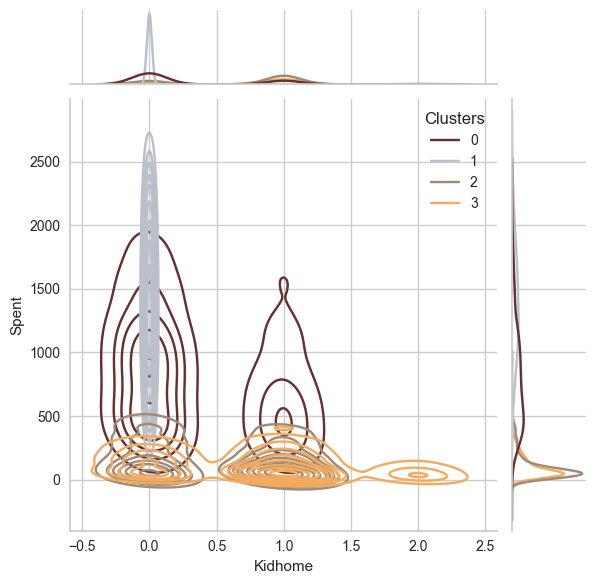

<Figure size 800x550 with 0 Axes>

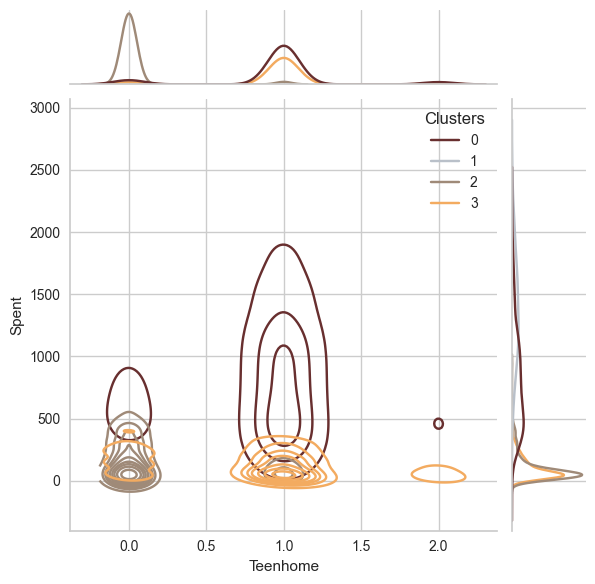

<Figure size 800x550 with 0 Axes>

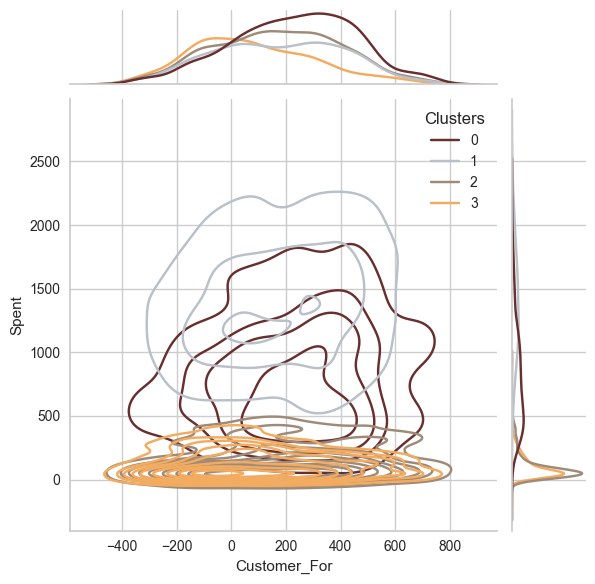

<Figure size 800x550 with 0 Axes>

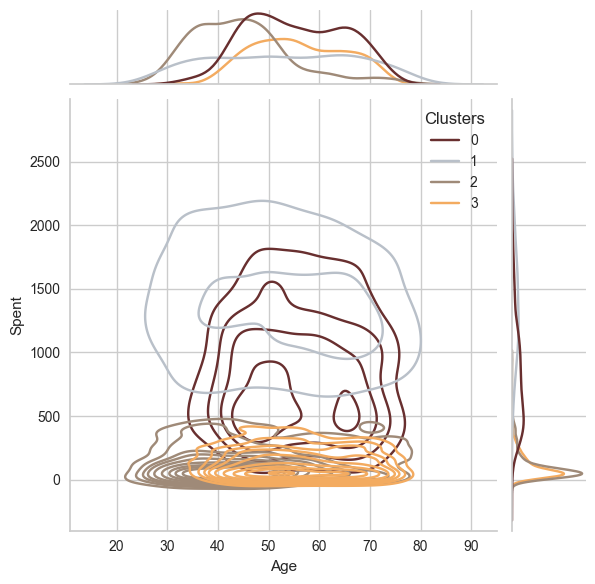

<Figure size 800x550 with 0 Axes>

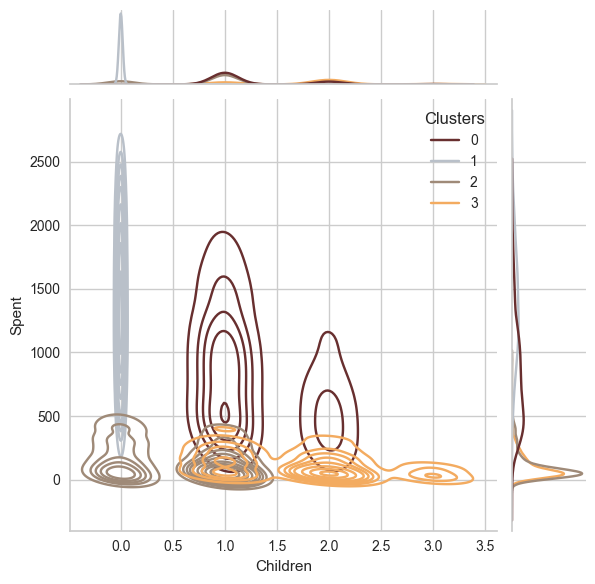

<Figure size 800x550 with 0 Axes>

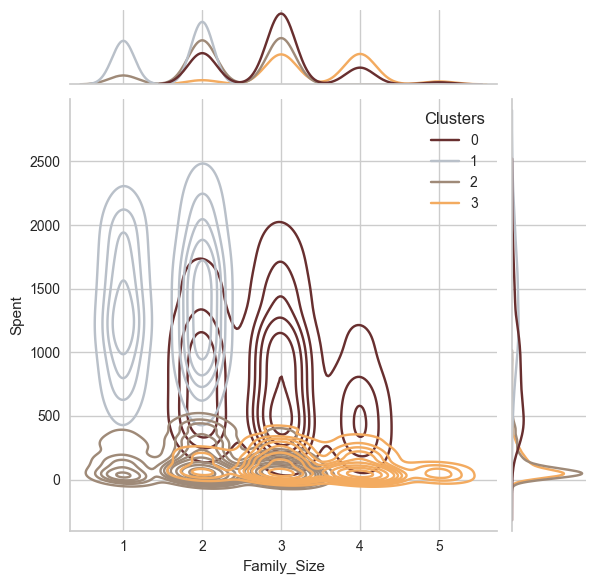

<Figure size 800x550 with 0 Axes>

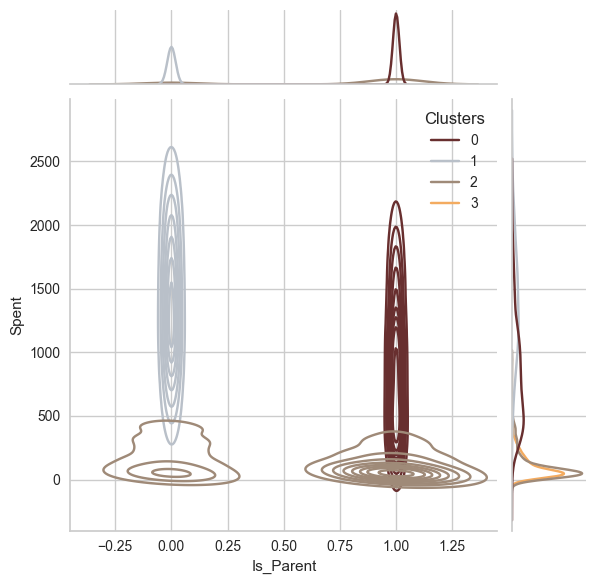

<Figure size 800x550 with 0 Axes>

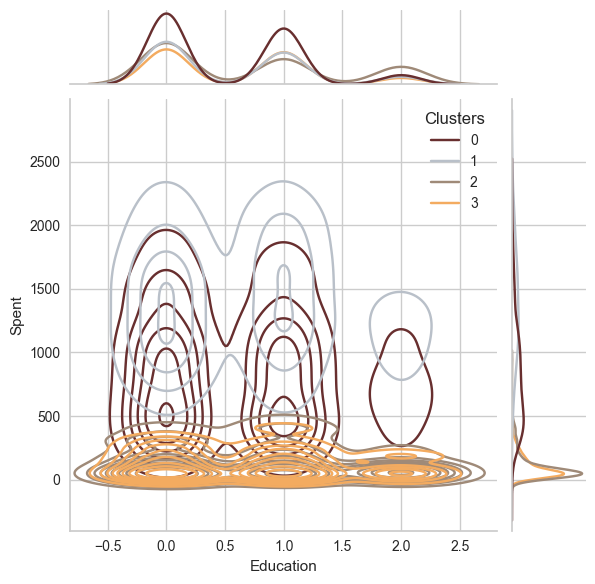

<Figure size 800x550 with 0 Axes>

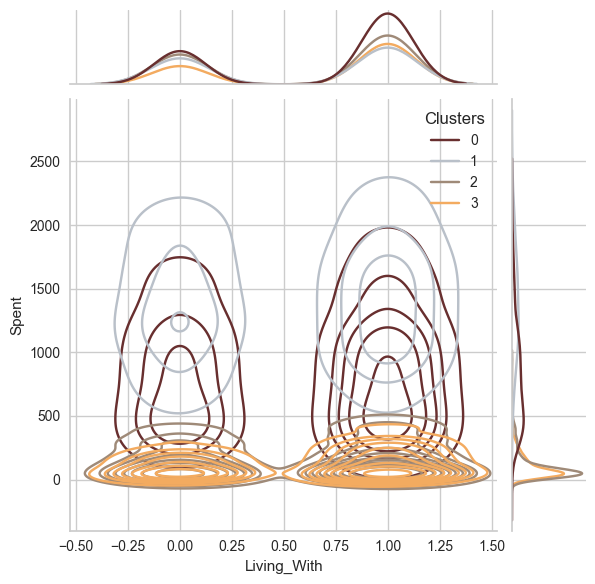

In [185]:
Personal = ["Kidhome","Teenhome","Customer_For","Age","Children","Family_Size","Is_Parent","Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i],y=data["Spent"],hue=data["Clusters"],kind="kde",palette=pal)
    plt.show()

Cluster 0 - high spending and avg income
- a parent
- max 4 members and atleats 2
- single parents are a subset of the group
- most have teenager at home
- relatively older
Cluster 1 - high spending and high income
- are definately not a parent
- at the max are only 2 members in the family
- a slight majority of couples over single people
- span all ages
- a high income group

Cluster 2-low spending and low income
- The majority of these are parents
- max are 3 members in the family
- majority have one kid
- relatively younger

Cluster 3 - high spending and low income
- def a parent
- max are 5 members in the family
- majority of them have a teenager at home
- relatively older
- lower income group
